# MODELO CLASIFICACION RANDOM FOREST 






Presentamos e importamos todas las librerías que vamos a necesitar a lo largo del modelo.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 



Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y nombre de las Columnas / variables que la componen. Las variables que se refieren a unidades de negocio no van a ser utilizadas en el modelo por lo que las transformamos a Objeto para una mejor comprensión y segmentación de las propias variables.

In [2]:
# CAMBIAR SEGUN RUTA LOCAL DONDE ESTE UBICADO EL REPOSITORIO
ruta = '/Users/manue/TFM'

In [3]:
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [4]:
# Transformamos las variables de la unidad de negocio en objeto ya que no queremos utilizarlas.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [5]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


## Primera Aproximacion al modelo

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [8]:
# Instanciamos el clasificador
clfforest_first_aproach = RandomForestClassifier()

In [9]:
# Entrenamos el Modelo
clfforest_first_aproach.fit(X,y)

RandomForestClassifier()

In [10]:
# Predicciones
clfforest_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Dividimos el Data Frame en set de entrenamiento y Test.  80% Entrenamiento y 20% TEst
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
# Entrenamos
clfforest_first_aproach.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
# Predicciones
clfforest_first_aproach.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
# Probabilidades de tener seguro de hogar
clfforest_first_aproach.predict_proba(X_test)[:, 1]

array([0.03, 0.26, 0.57, ..., 0.1 , 0.09, 0.28])

In [15]:
# Resultados obtenidos Primera Aproximación

accuracy_score_first_aproach = accuracy_score(y_test,clfforest_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clfforest_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clfforest_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clfforest_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clfforest_first_aproach.predict_proba(X_test)[:, 1])

print('== Primera Aproximacion RandomForest ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== Primera Aproximacion RandomForest ==
------------------------------------
accuracy_score = 0.8558515646635281
------------------------------------
precision  = 0.40611620795107034
------------------------------------
recall = 0.22537123462028003
------------------------------------
f1_score = 0.28987721691678037
------------------------------------
roc_auc_score = 0.7838951577162342


Sin Entrenar: ROC AUC=0.500
Tree: ROC AUC=0.784


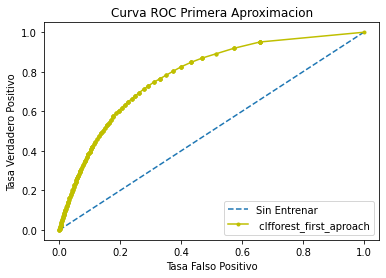

In [16]:
# Ploteamos la Curva ROC
# Generamos un Clasificador sin entrenar
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest_first_aproach.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest_first_aproach' , color = "y")
# Etiquetas
pyplot.title('Curva ROC Primera Aproximacion')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Construccion del Modelo

In [17]:
# Read Data Frame 
df_normalized = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Preprocessing/df_encoded.csv')

In [18]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417812 entries, 0 to 417811
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   saldo_captacion     417812 non-null  float64
 1   saldo_financiacion  417812 non-null  float64
 2   edad                417812 non-null  float64
 3   seg_valor           417812 non-null  int64  
 4   saldo_ffii          417812 non-null  int64  
 5   saldo_plp           417812 non-null  int64  
 6   lp_dom_ingresos     417812 non-null  int64  
 7   lp_rbos             417812 non-null  int64  
 8   camino_digital      417812 non-null  int64  
 9   seg_recorrido       417812 non-null  int64  
 10  marca_ccte          417812 non-null  int64  
 11  lp_seg_vida         417812 non-null  int64  
 12  lp_seg_auto         417812 non-null  int64  
 13  marca_bp            417812 non-null  int64  
 14  lp_tjta_cto         417812 non-null  int64  
 15  lp_tjt_rev          417812 non-nul

In [19]:
df_normalized.columns

Index(['saldo_captacion', 'saldo_financiacion', 'edad', 'seg_valor',
       'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'lp_rbos',
       'camino_digital', 'seg_recorrido', 'marca_ccte', 'lp_seg_vida',
       'lp_seg_auto', 'marca_bp', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_seg_acc',
       'lp_seg_hogar'],
      dtype='object')

In [20]:
df.sample(5)

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
37942,1360.93,0.00,0.0,0.0,0,0,0,1,0,72.0,0,0,0,0,0
367960,18338.94,4.92,0.0,0.0,1,1,1,1,1,30.0,0,0,0,0,0
414998,24996.83,15751.15,0.0,0.0,1,1,0,1,0,60.0,0,0,0,1,0
180572,14130.19,0.00,0.0,1737.2,1,0,0,1,1,64.0,0,0,0,0,0
236486,1467.58,0.00,0.0,0.0,1,0,0,1,0,73.0,0,0,0,0,0


In [21]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 7102804 (417812, 17)
Datos y = 417812 (417812,)


In [22]:
# Dividimos el DF en set de entrenamiento y Test (80% train - 20% test)
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [23]:
# Shapes Train
X_train.shape, y_train.shape

((334249, 17), (334249,))

In [24]:
# Shapes Test
X_test.shape,y_test.shape

((83563, 17), (83563,))

In [25]:
# Instanciamos el Clasificador. Incorporamos un primer estimador para balancear el data set.
clfforest = RandomForestClassifier(class_weight = 'balanced')

In [26]:
# Entrenamos
clfforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [27]:
# Predicciones
clfforest.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# Probabilidades de tener seguro de hogar
clfforest.predict_proba(X_test)[:, 1]

array([0.09, 0.05, 0.  , ..., 0.01, 0.  , 0.01])

In [29]:
# Todas las probabilidades
clfforest.predict_proba(X_test)

array([[0.91, 0.09],
       [0.95, 0.05],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01]])

__Primeros resultados__. Los resultados obtenidos en el entrenamiento y test utilizando la métrica Recall como medida muestran que el modelo no está generalizando bien. Hay una situación grave de sobreajuste que debo resolver. Lo confirmaremos mediante la Validación Cruzada. 

In [30]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9996493995968095
===========RECALL TEST=============
recall = 0.38136775994417305


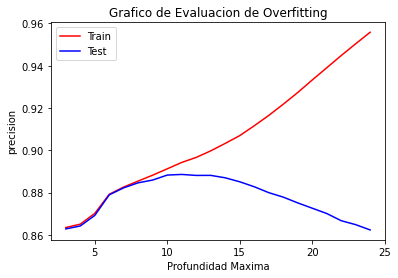

In [31]:
# Grafico de Evaluacion de Overfitting
# Se confirma con esta visualizacion que a partir de 8 profundidades el modelo empieza a generar overfitting
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 25))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='gini', max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Ploteamos.
plt.plot(max_deep_list, train_prec, color='r', label='Train')
plt.plot(max_deep_list, eval_prec, color='b', label='Test')
plt.title('Grafico de Evaluacion de Overfitting')
plt.legend()
plt.ylabel('precision')
plt.xlabel('Profundidad Maxima')
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Evaluacion de Overfitting.png', dpi=75,bbox_inches='tight')

## Técnicas de validación cruzada.  Métricas: Validación cruzada
Utilizamos la validación cruzada iterando 5 veces a lo largo del conjunto de entrenamiento.

- Apartamos 1/5 muestras.
- Entrenamos el modelo con las 4/5 muestras restantes.
- Mediremos con diferentes métricas el resultado obtenido en las muestras apartadas.
- Esto significa que hacemos 5 entrenamientos independientes.
- El resultado será la media de las 5 métricas anteriores.

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.6022989810290005, 0.3762171628721541, 0.46393034826539187)

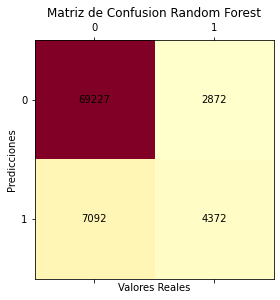

In [33]:
# Plot Matriz de Confusion 
# Plot Matriz de Confusion 
matriz_confusion_clfforest = confusion_matrix(y_test,clfforest.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest.shape[0]):
    for j in range(matriz_confusion_clfforest.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.title('Matriz de Confusion Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Confusion_Matrix_Random Forest.png', dpi=75,bbox_inches='tight')
plt.show()

In [34]:
# Resultados

accuracy_score_clfforest = accuracy_score(y_test,clfforest.predict(X_test))
precision_clfforest  = precision_score(y_test,clfforest.predict(X_test))
recall_clfforest = recall_score(y_test,clfforest.predict(X_test))
f1_score_clfforest = f1_score(y_test,clfforest.predict(X_test))
roc_auc_score_clfforest = roc_auc_score(y_test,clfforest.predict_proba(X_test)[:, 1])

print('==== Random Forest RESULTADOS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clfforest )
print('------------------------------------')
print('precision  =',precision_clfforest)
print('------------------------------------')
print('recall =', recall_clfforest)
print('------------------------------------')
print('f1_score =', f1_score_clfforest)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clfforest)

==== Random Forest RESULTADOS ====
------------------------------------
accuracy_score = 0.8807606237210248
------------------------------------
precision  = 0.6035339591385974
------------------------------------
recall = 0.38136775994417305
------------------------------------
f1_score = 0.4673936283942698
------------------------------------
roc_auc_score = 0.8648187128176001


## Ploteamos Curva ROC

Sin Entrenar : ROC AUC=0.500
Random Forest: ROC AUC=0.865


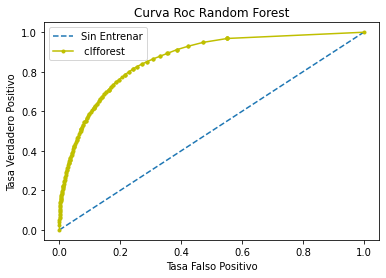

In [35]:
# Ploteamos la Curva ROC
# Generamos un Clasificador sin entrenar
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva Roc
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest' , color = "y")
# Etiquetas
pyplot.title('Curva Roc Random Forest')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST- Roc Curve.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## GridSearchCV  
Permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada.


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Sugerimos la busqueda de los mejores parametros

forest_grid_params = {
    'n_estimators' : [100,125],
    'max_features' : ["auto", "log2"],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [15,20]
    }

forestgs = GridSearchCV(
        clfforest,
        forest_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )


In [38]:
forestgs.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 31.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 125]},
             verbose=1)

In [39]:
# Mejores Estimadores
forestgs.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=15, n_estimators=125)

In [40]:
# Mejores Parametros
forestgs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 125}

## Construccion del Modelo con los Mejores Parametros atendiendo a GridSearch

In [41]:
clfforest_gs = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',
                                  max_depth = 10, max_features = 'auto', min_samples_split = 2,
                                  n_estimators = 100, min_samples_leaf = 15 )

In [42]:
clfforest_gs.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=15)

In [43]:
clfforest_gs.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
clfforest_gs.predict_proba(X_test)[:, 1]

array([0.59501406, 0.57770261, 0.05592677, ..., 0.07870648, 0.03311159,
       0.17378661])

__Evaluación del overfitting__ Los resultados obtenidos del entrenamiento y test usando la métrica recall como medida muestran que el overfitting ha sido resuelto usando mejores parámetros. Confirmado por la Validación Cruzada.

In [45]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest_gs.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest_gs.predict(X_test)))

===========RECALL TRAIN============
recall = 0.869445174861951
===========RECALL TEST=============
recall = 0.8599092812281927


## Cross validation

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest_gs,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest_gs,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest_gs,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.3612063245707866, 0.8604903677758318, 0.5071545792674303)

### Matriz de Confusion

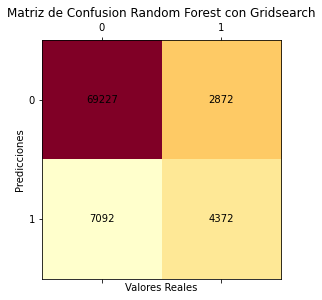

In [47]:
matriz_confusion_clfforest_gs = confusion_matrix(y_test,clfforest_gs.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest_gs, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest_gs.shape[0]):
    for j in range(matriz_confusion_clfforest_gs.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.title('Matriz de Confusion Random Forest con Gridsearch')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST Model - Confusion_Matrix_Gridsearch.png', dpi=75,bbox_inches='tight')
plt.show()

In [48]:
# Resultados

accuracy_score_clfforest_gs = accuracy_score(y_test,clfforest_gs.predict(X_test))
precision_clfforest_gs  = precision_score(y_test,clfforest_gs.predict(X_test))
recall_clfforest_gs = recall_score(y_test,clfforest_gs.predict(X_test))
f1_score_clfforest_gs = f1_score(y_test,clfforest_gs.predict(X_test))
roc_auc_score_clfforest_gs = roc_auc_score(y_test,clfforest_gs.predict_proba(X_test)[:, 1])

print('==== Random Forest RESULTADOS FINALES ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clfforest_gs )
print('------------------------------------')
print('precision  =',precision_clfforest_gs)
print('------------------------------------')
print('recall =', recall_clfforest_gs)
print('------------------------------------')
print('f1_score =', f1_score_clfforest_gs)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clfforest_gs)

==== Random Forest RESULTADOS FINALES ====
------------------------------------
accuracy_score = 0.7719445209003986
------------------------------------
precision  = 0.3609798967373393
------------------------------------
recall = 0.8599092812281927
------------------------------------
f1_score = 0.5084981817243959
------------------------------------
roc_auc_score = 0.8868270891616451


## Curva Roc

Sin Entrenar : ROC AUC=0.500
Random Forest: ROC AUC=0.887


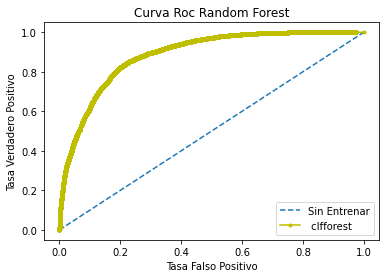

In [49]:
# Ploteamos la Curva ROC
# Generamos un Clasificador sin entrenar
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest_gs.predict_proba(X_test)[:, 1])
# Print
print('Sin Entrenar : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos la Curva Roc
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest_gs.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin Entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest' , color = "y")
# Etiquetas
pyplot.title('Curva Roc Random Forest')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa Verdadero Positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/RANDOMFOREST- Roc Curve GridSearch.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Evolucion de Resultados

In [50]:
print('Resultados 1ª Aproximacion: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Resultados model: RECALL %f, AUC %f' %(recall_clfforest, roc_auc_score_clfforest))
print('Resultados model con gridsearch: RECALL %f, AUC %f' %(recall_clfforest_gs, roc_auc_score_clfforest_gs))

Resultados 1ª Aproximacion: RECALL 0.225371, AUC 0.783895
Resultados model: RECALL 0.381368, AUC 0.864819
Resultados model con gridsearch: RECALL 0.859909, AUC 0.886827


In [51]:
import pickle 
pickle_out = open(ruta + '/Financial-Product-Sales-Forecast-Model/Frontend/clfforest_gs.pkl', mode = "wb") 
pickle.dump(clfforest_gs, pickle_out) 
pickle_out.close()

 ## *** Conclusion ***

- Las métricas elegidas__ para evaluar nuestro modelo de clasificación Random Forest son __Recall y AUC - Roc Curve.__. 
- Comenzamos nuestro modelo con una __primera aproximación__ obteniendo resultados __muy mejorables__. Recall 0.22__ La base de datos utilizada es la original sin ningún tipo de preprocesamiento. 
- Evolucionamos nuestro modelo. Utilizamos como base de datos df_encoded. (Adaptado y aplicado Label Encoder). Dada la naturaleza del modelo no era necesario aplicar normalizacion ni PCA.
- Dado que nuestro __Objetivo está muy desequilibrado__ en una proporción de 87% de No y 13% de Sí, se ha utilizado el parámetro 'class_weight = 'balanced' en la configuración del modelo.
- Obtenemos nuestra primera métrica relacionada con la posibilidad de sobreajuste. Vemos cómo nuestro conjunto de entrenamiento no ha generalizado bien. Hay una gran diferencia entre los resultados obtenidos en Test y Train. 99 de entrenamiento - 37 de prueba. Podemos en este caso confirmar la existencia de overfitting__ Todo esto lo podemos ver en una gráfica de ajuste del entrenamiento donde podemos ver que después de 8 nodos Train y Test empiezan a separarse - Probamos por Validación Cruzada obteniendo medias de diferentes métricas. Las métricas resultantes de esta primera evolución del modelo son 37% Recall y 86% Auc. 

- Necesitamos mejorar el modelo y para ello utilizamos GridSearchCV para buscar soluciones y mejores parámetros. Una vez obtenido, volvemos a entrenar y obtenemos de nuevo las métricas Recall 86% Train - 85% Test para confirmar entre otras cosas que hemos conseguido solucionar el overfitting y que nuestro modelo ha conseguido generalizar bien. Confirmamos con la Validación Cruzada obteniendo las medias de las diferentes métricas con 5 validaciones.
 
- Las métricas finalmente obtenidas "Recall" 0,85 y AUC 0,88 que consideramos adecuadas para la explicación de nuestro modelo. 
- Matriz de Confusión. En la diagonal de aciertos tenemos 69274 y 4347. En nuestro modelo prima la detección de los clientes que sí quieren contratar el seguro.  Necesitamos obtener una buena tasa de verdaderos positivos. Recordemos que nuestras métricas objetivo son Recall y AUC. Si detectamos a los clientes que probablemente vayan a contratar un seguro de hogar, podremos trabajar de forma más directa. Todo ello con el objetivo de optimizar el tiempo y la eficiencia comercial. El resultado de Recall obtenido es óptimo, con un 85% y un 88% en AUC.
- El modelo podria ser perfeccionado si se utilizasen variables adicionales. Nos faltan, entre otras muchas, variables y datos como los ingresos del cliente, los hijos, el tipo de trabajo, el salario real en euros obtenido, el lugar de residencia... etc. 




## Testing 

In [52]:
X_new = pd.DataFrame({'edad':[45], 'saldo_captacion':[1000], 'saldo_financiacion':[100], 
        'seg_valor':[1], 'seg_recorrido':[3],'marca_ccte':[1],'camino_digital':[0], 'marca_bp':[1],
        'saldo_ffii':[1], 'saldo_plp':[1], 'lp_dom_ingresos':[1], 'lp_rbos':[0],'lp_seg_vida':[1], 
        'lp_seg_auto':[1],'lp_seg_acc':[1],'lp_tjta_cto':[1], 'lp_tjt_rev':[0],})

In [53]:

prediccion = clfforest_gs.predict(X_new)

In [54]:
prediccion

array([0], dtype=int64)

In [55]:
probabilidades = clfforest_gs.predict_proba(X_new)

In [56]:
if prediccion == 1:
    print('Llama')
    print('Probabilidad de que si contrate: ',probabilidades[:, 1])
else:
    print('No llames')
    print('Probabilidad de que no contrate: ', probabilidades[:, 0])

No llames
Probabilidad de que no contrate:  [0.55249848]


X_new = pd.DataFrame({'edad':[45], 'saldo_captacion':[1000], 'saldo_financiacion':[100], 
        'seg_valor':[1], 'seg_recorrido':[3],'marca_ccte':[1],'camino_digital':[0], 'marca_bp':[1],
        'saldo_ffii':[1], 'saldo_plp':[1], 'lp_dom_ingresos':[1], 'lp_rbos':[0],'lp_seg_vida':[1], 
        'lp_seg_auto':[1],'lp_seg_acc':[1],'lp_tjta_cto':[1], 'lp_tjt_rev':[0],})

In [57]:
def prediccion (edad, marca_bp, seg_valor, seg_recorrido, marca_ccte, camino_digital,
              saldo_ffii, saldo_plp, lp_dom_ingresos, lp_rbos,
              lp_seg_vida ,lp_seg_auto ,lp_seg_acc, lp_tjta_cto, lp_tjt_rev,
              saldo_captacion, saldo_financiacion ):   
      
    #Nº1--------------------------------------
    edad == edad
    
    #Nª2--------------------------------------
    if marca_bp == "NO":
        marca_bp = 0
    else:
        marca_bp = 1
        
    #Nª3--------------------------------------    
    if seg_valor ==   "ALTO":
        seg_valor = 0
    elif seg_valor == "MEDIO":
        seg_valor = 2
    else:
        seg_valor = 1  
        
    #Nª4--------------------------------------
    if seg_recorrido ==   "ALTO":
        seg_recorrido = 0
    elif seg_recorrido == "MEDIO":
        seg_recorrido = 2
    elif seg_recorrido == "BAJO":
        seg_recorrido = 1   
    else:
        seg_recorrido = 3
        
    #Nª5--------------------------------------    
    if marca_ccte ==   "AF":
        marca_ccte = 0
    elif marca_ccte == "CCTE":
        marca_ccte = 1
    else:
        marca_ccte = 0 
    
    #Nª6--------------------------------------    
    if camino_digital ==   "SIN USO":
        camino_digital = 3
    elif camino_digital == "CONSULTIVO":
        camino_digital = 1
    elif camino_digital == "TRANSACCIONAL":
        camino_digital = 4
    elif camino_digital == "POCO USO":
        camino_digital = 2
    else:
        camino_digital = 0
        
    #Nª7--------------------------------------    
    if saldo_ffii == "NO":
        saldo_ffii = 0
    else:
        saldo_ffii = 1
        
    #Nª8--------------------------------------    
    if saldo_plp == "NO":
        saldo_plp = 0
    else:
        saldo_plp = 1
        
    #Nª9--------------------------------------    
    if lp_dom_ingresos == "NO":
        lp_dom_ingresos = 0
    else:
        lp_dom_ingresos = 1

    #Nª10--------------------------------------    
    if lp_rbos == "NO":
        lp_rbos = 0
    else:
        lp_rbos = 1

    #Nª11--------------------------------------    
    if lp_seg_vida == "NO":
        lp_seg_vida = 0
    else:
        lp_seg_vida = 1
    
    #Nª12--------------------------------------    
    if lp_seg_auto == "NO":
        lp_seg_auto = 0
    else:
        lp_seg_auto = 1
        
    #Nª13--------------------------------------    
    if lp_seg_acc == "NO":
        lp_seg_acc = 0
    else:
        lp_seg_acc = 1
    
    #Nª14--------------------------------------    
    if lp_tjta_cto == "NO":
        lp_tjta_cto = 0
    else:
        lp_tjta_cto = 1

    #Nª15--------------------------------------    
    if lp_tjt_rev == "NO":
        lp_tjt_rev = 0
    else:
        lp_tjt_rev = 1
        
    #Nª16--------------------------------------    
    saldo_captacion == saldo_captacion
    
    #Nª17--------------------------------------    
    saldo_financiacion == saldo_financiacion

        
    # Predicciones 
    prediccion = clasificador.predict( 
        [[edad, marca_bp, seg_valor, seg_recorrido, marca_ccte, camino_digital,
              saldo_ffii, saldo_plp, lp_dom_ingresos, lp_rbos,
              lp_seg_vida ,lp_seg_auto ,lp_seg_acc, lp_tjta_cto, lp_tjt_rev,
              saldo_captacion, saldo_financiacion]])
     
    if prediccion == 0:
        pred = 'NO LLAMES'
    else:
        pred = 'LLAMA'
    return pred


In [58]:
# Definicion del Cuestionario
edad = input('Edad del Cliente')

saldo_captacion = input('Saldo en Cuenta del Cliente')
saldo_financiacion = input('Financiacion del Cliente')

seg_valor = input('Segmento Valor, [ALTO, MEDIO, BAJO]')
seg_recorrido = input('Recorrido cliente,[ALTO , MEDIO , BAJO ,NO CALCULADO]') 
marca_ccte = input('Tipo de Gestor,[ASESOR EN OFICINA, ASESOR EN INTERNET, SIN ASESOR]')
camino_digital = input('Para que usa la APP internet,['COMPRADOR', 'CONSULTIVO', 'TRANSACCIONAL', 'POCO USO','SIN USO'])

marca_bp = input('Es cliente Banca Personal, [SI,NO]')
saldo_ffii = input('Tiene Fondos de Inversion, [SI,NO]')
saldo_plp = input('Tiene Plan de Pension, [SI,NO]')
lp_dom_ingresos = input('Tiene domiciliados la nomina, [SI,NO]')
lp_rbos = input('Tiene domiciliados los recibos, [SI,NO]')
lp_seg_vida = input('Tiene seguro de vida, [SI,NO]')
lp_seg_auto = input('Tiene seguro de coche, [SI,NO]')
lp_seg_acc = input('Tiene seguro de accidentes, [SI,NO]')
lp_tjta_cto = input('Tiene tarjeta de credito, [SI,NO]')
lp_tjt_rev = input('Tiene revolving, [SI,NO]')


SyntaxError: invalid syntax (<ipython-input-58-2977ef6c749f>, line 10)